In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [ ]:
usgs_quakes = pd.read_csv('usgs_1980_6_5_above.csv')
noaa_quakes = pd.read_csv('noaa_quakes.tsv', sep='\t')

In [ ]:
usgs_quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-02-13T14:07:50.397Z,37.7453,141.7494,49.94,7.1,mww,NaN,33.0,3.073,1.12,us,us6000dher,2021-03-02T02:24:53.202Z,"72 km ENE of Namie, Japan",earthquake,7.0,3.5,0.036,74.0,reviewed,us,us
1,2021-02-10T13:19:55.905Z,-23.0542,171.6008,10.00,7.7,mww,NaN,22.0,8.030,1.16,us,us6000dg77,2021-03-01T18:39:00.824Z,southeast of the Loyalty Islands,earthquake,8.3,1.8,0.042,54.0,reviewed,us,us
2,2021-02-03T05:23:44.293Z,-36.1899,-97.6645,10.00,6.7,mww,NaN,70.0,13.422,1.07,us,us6000de34,2021-02-04T05:28:33.747Z,West Chile Rise,earthquake,10.2,1.8,0.048,41.0,reviewed,us,us
3,2021-01-23T23:36:50.905Z,-61.8154,-55.5076,9.74,6.9,mww,NaN,16.0,1.546,0.55,us,us7000d2rx,2021-02-25T05:03:09.869Z,South Shetland Islands,earthquake,6.6,2.9,0.043,52.0,reviewed,us,us
4,2021-01-21T12:23:04.255Z,4.9931,127.5145,80.00,7.0,mww,NaN,15.0,2.821,0.77,us,us7000d20e,2021-03-01T13:37:46.891Z,"211 km SE of Pondaguitan, Philippines",earthquake,6.3,1.9,0.061,26.0,reviewed,us,us


In [ ]:
noaa_quakes.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""1980 <= Year >= 2021""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1980.0,1.0,1.0,16.0,42.0,42.0,4259.0,NaN,"AZORES: TERCEIRA, ANGRA DO HEROISMO",38.727,-27.750,13.0,6.9,8.0,69.0,2.0,NaN,NaN,600.0,3.0,5.0,2.0,NaN,NaN,NaN,NaN,69.0,2.0,NaN,NaN,600.0,3.0,5.0,2.0,NaN,NaN,NaN,NaN
2,NaN,1980.0,1.0,24.0,19.0,0.0,9.5,NaN,NaN,CALIFORNIA: LIVERMORE,37.855,-121.816,11.0,5.9,7.0,NaN,NaN,NaN,NaN,50.0,1.0,11.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1.0,11.5,3.0,NaN,NaN,NaN,NaN
3,NaN,1980.0,2.0,23.0,5.0,51.0,3.2,2123.0,NaN,RUSSIA: KURIL ISLANDS,43.530,146.753,44.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1980.0,4.0,16.0,12.0,18.0,20.6,NaN,NaN,INDONESIA: JAVA: TASIKMALAJA,-8.082,108.793,84.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [ ]:
usgs_quakes.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
noaa_quakes.columns

Index(['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)',
       'Mag', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')

### Hypothesis 3: Deeper earthquake cause more damage.
-How correlated is depth with damage/deaths/magnitude?
<br> -Do certain areas get deeper earthquakes? (increased death may not be because of depth, but might be because deeper earthquakes hit less-prepared areas more often?)


In [ ]:
noaa_depth = noaa_quakes[['Focal Depth (km)', 'Mag', 'Total Deaths',
       'Total Missing', 'Total Injuries','Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Houses Damaged']]
noaa_depth['Location'] = noaa_quakes['Location Name'].str.split(':').str[0]
noaa_depth.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Focal Depth (km),Mag,Total Deaths,Total Missing,Total Injuries,Total Damage ($Mil),Total Houses Destroyed,Total Houses Damaged,Location
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,6.9,69.0,NaN,600.0,5.0,NaN,NaN,AZORES
2,11.0,5.9,NaN,NaN,50.0,11.5,NaN,NaN,CALIFORNIA
3,44.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,RUSSIA
4,84.0,5.8,NaN,NaN,NaN,NaN,NaN,NaN,INDONESIA


In [ ]:
noaa_depth_death = noaa_depth[noaa_depth['Total Deaths'].notnull()]
noaa_depth_death

,Focal Depth (km),Mag,Total Deaths,Total Missing,Total Injuries,Total Damage ($Mil),Total Houses Destroyed,Total Houses Damaged,Location
1,13.0,6.9,69.0,NaN,600.0,5.00,NaN,NaN,AZORES
7,4.0,5.2,61.0,NaN,NaN,2000.00,NaN,NaN,WASHINGTON
10,5.0,6.4,1.0,NaN,100.0,NaN,NaN,NaN,MEXICO
13,14.0,6.4,1.0,NaN,NaN,5.00,NaN,NaN,GREECE
15,10.0,4.0,1.0,NaN,17.0,5.00,NaN,NaN,GREECE
...,...,...,...,...,...,...,...,...,...
1837,10.0,6.6,2.0,NaN,50.0,0.57,138.0,1167.0,PHILIPPINES
1839,21.0,7.0,118.0,NaN,1054.0,400.00,NaN,NaN,GREECE
1841,10.0,6.4,8.0,NaN,36.0,1000.00,1500.0,46000.0,BALKANS NW
1842,18.0,6.2,105.0,3.0,6489.0,58.70,1150.0,7863.0,INDONESIA


In [ ]:
alt.Chart(noaa_depth_death).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Focal Depth (km)', title='Focal Depth (km)'),
    y=alt.Y('Total Deaths', title='Total Deaths'),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location', 'Focal Depth (km)', 'Total Deaths']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Deaths by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

This chart is very difficult to interpret because the vast majority is clustered around the x axis below 250 km. Removing the most extreme points and zooming in on the clustered region, we get the following enhanced chart. 

In [ ]:
filtered = noaa_depth_death[noaa_depth_death['Total Deaths'] < 300]
filtered = filtered[filtered['Focal Depth (km)'] < 100]
alt.Chart(filtered).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Focal Depth (km)', title='Focal Depth (km)', scale=alt.Scale(domain=(0,100))),
    y=alt.Y('Total Deaths', title='Total Deaths', scale=alt.Scale(domain=(0,300))),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location', 'Focal Depth (km)', 'Total Deaths']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Deaths by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

Even after narrowing the Y axis down from 0-50000 to 0-300, the points are still heavily clustered. There does not seem to be a very clearly linear relationship here.

In [ ]:
noaa_depth_injury = noaa_depth[noaa_depth['Total Injuries'].notnull()]
filtered = noaa_depth_injury[noaa_depth_injury['Total Injuries'] < 3000]
filtered = filtered[filtered['Focal Depth (km)'] < 150]
alt.Chart(filtered).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Focal Depth (km)', title='Focal Depth (km)', scale=alt.Scale(domain=(0,150))),
    y=alt.Y('Total Injuries', title='Total Injuries', scale=alt.Scale(domain=(0,3000))),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location', 'Focal Depth (km)', 'Total Injuries']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Injuries by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

The chart comparing depth with injuries is more or less the same, and there is heavy clustering in the bottom left corner. This chart also does not show a strong correlation.

In [ ]:
noaa_depth_damage = noaa_depth[noaa_depth['Total Damage ($Mil)'].notnull()]
filtered = noaa_depth_damage[noaa_depth_damage['Total Damage ($Mil)'] < 4000]
filtered = filtered[filtered['Focal Depth (km)'] < 70]
alt.Chart(filtered).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Focal Depth (km)', title='Focal Depth (km)', scale=alt.Scale(domain=(0,70))),
    y=alt.Y('Total Damage ($Mil)', title='Total Damage ($Mil)', scale=alt.Scale(domain=(0,4000))),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location', 'Focal Depth (km)', 'Total Damage ($Mil)']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Damage by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

Comparing depth with damage is again more or less the same, with heavy clustering in the bottom left.

In [ ]:
noaa_depth_damage = noaa_depth[noaa_depth['Total Missing'].notnull()]
filtered = noaa_depth_damage[noaa_depth_damage['Total Missing'] < 2000]
filtered = filtered[filtered['Focal Depth (km)'] < 100]
alt.Chart(filtered).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Focal Depth (km)', title='Focal Depth (km)', scale=alt.Scale(domain=(0,100))),
    y=alt.Y('Total Missing', title='Total Missing', scale=alt.Scale(domain=(0,2000))),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location', 'Focal Depth (km)', 'Total Missing']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Missing by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

In [ ]:
noaa_depth.isnull().sum(), noaa_depth.isnull().sum()/noaa_depth.shape[0]

(Focal Depth (km)            13
 Mag                          4
 Total Deaths              1035
 Total Missing             1826
 Total Injuries             875
 Total Damage ($Mil)       1498
 Total Houses Destroyed    1385
 Total Houses Damaged      1451
 Location                     1
 dtype: int64, Focal Depth (km)          0.007031
 Mag                       0.002163
 Total Deaths              0.559762
 Total Missing             0.987561
 Total Injuries            0.473229
 Total Damage ($Mil)       0.810168
 Total Houses Destroyed    0.749054
 Total Houses Damaged      0.784749
 Location                  0.000541
 dtype: float64)

Total missing does not really help the analysis, since so many (98.7% of entries) have missing values.

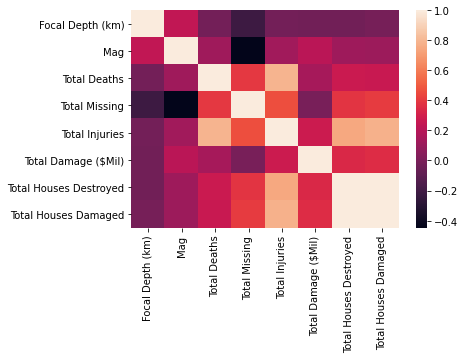

In [ ]:
corr = noaa_depth.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


The correlation between focal depth and deaths, missing, injuries, and damage seems to be close to 0, and in all cases as shown above, there are clear outliers than can heavily influence the correlation. Therefore, there doesn't seem to be much of a relationship between focal depth and damage caused.

In [ ]:
country_depth = noaa_depth.groupby('Location')['Focal Depth (km)'].mean()
country_depth

Location
AFGHANISTAN                  91.300000
AFGHANISTAN-TAJIKISTAN      134.500000
AFGHANISTAN; PAKISTAN       186.000000
ALABAMA                      20.000000
ALASKA                       28.307692
                               ...    
WASHINGTON                   28.000000
WASHINGTON-OREGON BORDER     21.000000
WYOMING                      20.500000
YEMEN                         7.500000
ZAMBIA                       30.000000
Name: Focal Depth (km), Length: 181, dtype: float64

In [ ]:
countries = pd.DataFrame(list(zip(country_depth.index, country_depth.values)), columns=['country/region', 'mean value'])
countries['mean value'] = countries['mean value'].apply(lambda x: x[0])
countries = countries.sort_values(['mean value'], ascending=False)

In [ ]:
countries.head()

,country/region,mean value
23,BOLIVIA-PERU,631.000000
130,PERU-BRAZIL,621.000000
50,FIJI ISLANDS,433.571429
122,PAKISTAN-NW AFGHANISTAN,208.000000
2,AFGHANISTAN; PAKISTAN,186.000000


In [ ]:
alt.Chart(countries).mark_bar().encode(
    x=alt.X('country/region', sort='-y'),
    y=alt.X('mean value')
).interactive()

alt.Chart(...)

Latin America seems to have high instances of deep earthquakes, with Central Asia also commonly experiencing them. However this information alone is not conclusive enough. Applying these results, we can plot earthquakes onto a world map. The first plot shows the shallower earthquakes, and the second plot shows the deeper earthquakes.

In [ ]:
from vega_datasets import data
shallow = noaa_quakes[noaa_quakes['Focal Depth (km)'] < noaa_quakes['Focal Depth (km)'].median()]
countries = alt.topo_feature(data.world_110m.url, 'countries')
background = alt.Chart(countries).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project("equirectangular").properties(
    width=500,
    height=300
)


globalquakes = alt.Chart(shallow).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.value(10),
    tooltip='Focal Depth (km)'
)

background + globalquakes

alt.LayerChart(...)

In [ ]:
deep = noaa_quakes[noaa_quakes['Focal Depth (km)'] >= noaa_quakes['Focal Depth (km)'].median()]
countries = alt.topo_feature(data.world_110m.url, 'countries')
background = alt.Chart(countries).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project("equirectangular").properties(
    width=500,
    height=300
)


globalquakes = alt.Chart(deep).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.value(10),
    tooltip='Focal Depth (km)',
)

background + globalquakes

alt.LayerChart(...)



```
# This is formatted as code
```

There are some notable differences here - California, Greece, Turkey, Atlantic Islands, Australia, and Northern Africa seem to get mostly or entirely shallow earthquakes, where as Central/South America, Indonesia, Papua New Guinea and other Pacific Islands seem to get mostly or entirely deep earthquakes. The differences are most notable in Indonesia, the Pacific coast of Central/South America, and some Pacific Islands (bottom half of the far left section on the map).
 Building off of this, we will now examine the relationship between depth and magnitude.

In [ ]:
alt.Chart(noaa_depth).mark_circle(filled=True, 
                                size=200, 
                                opacity=0.9, 
                                color='tableau20').encode(
    x=alt.X('Focal Depth (km)', title='Focal Depth (km)', scale=alt.Scale(domain=(0,150))),
    y=alt.Y('Mag', title='Magnitude', scale=alt.Scale(domain=(3,10))),
    color=alt.Color('Location', legend=alt.Legend(title='Location')),
    tooltip=['Location', 'Focal Depth (km)', 'Mag']
).configure_axis(
    tickCount=10
).properties(
    title='Earthquake Magnitude by Location',
    width=600,
    height=400
).interactive()

alt.Chart(...)

There is a ton of clustering yet again, and there does not seem to be much of a clearly defined relationship between focal depth and magnitude. As expected from the correlation value between magnitude and depth (approximately 0.2), there is no clear trend here.

The above results show that in general, depth does not seem to have strong relationships with any of the examined variables except location. Magnitude and damage (whether it is measured in deaths, injuries, people missing, or monetary damage) seem to be quite independent of depth. However geographic location seemed to have some noticeable differences. Some regions received mostly shallow earthquakes (Greece, Turkey etc) whereas others (Indonesia, South America etc) received mostly deep earthquakes. This is presumably due to the structure of the different tectonic plates. However, since the depth does not seem to be heavily correlated with magnitude or damage, this difference may not actually be that meaningful or important. Further analysis is necessary to see whether this does have a noticeable impact on the effects of these earthquakes. 